## Dependencies

`json` is required for loading the file, `matplotlib.pyplot` is recommended for creating visualizations in Python, `numpy` is helpful for manipulating arrays that feed into `pyplot`, `os` is helpful for dealing with file paths. `math`, `time`, and `datetime` may be useful for manipulating data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math
import datetime
import time
import os

In [2]:
with open("routesSample.json") as fp:
    data=json.load(fp)

Example datapoint for vehicle: `data[`*`route index`*`]['routeStates'][`*`timestamp index`*`]['vehicles'][`*`vehicle index`*`]`

In [15]:
data[0]['routeStates'][0]['vehicles'][0]

{'did': '1____O_F00',
 'heading': 260,
 'lat': 37.789883,
 'lon': -122.434303,
 'vid': '5621'}

Example of a bus stop: `data[`*`route index`*`]['stops'][`*`bus stop index`*`]`

In [62]:
data[0]['stops'][0]

{'lat': 37.7954399,
 'lon': -122.39682,
 'name': 'Clay St & Drumm St',
 'sid': '4015'}

## Example Visualizations

Depict buses of one route at one timepoint

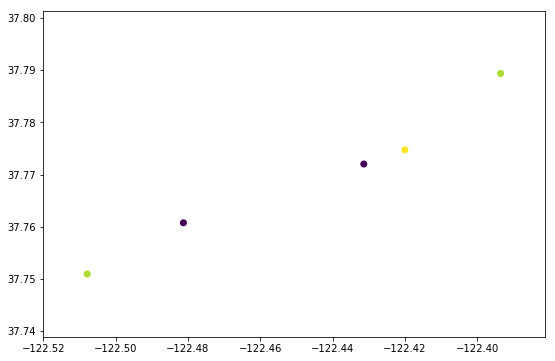

In [60]:
x1, y1, c1 = [*zip(*[(v['lon'],v['lat'],float(v['vid'])) for v in data[4]['routeStates'][24]['vehicles']])]
plt.figure(figsize=[9,6])
plt.scatter(x1,y1,c=c1)
plt.show()

Depict location of one bus over time. Here we use bus 5441 on Route 5 (`data[2]`) for its first 600 data points (150 minutes). Color-coded by time (blue->green->yellow).

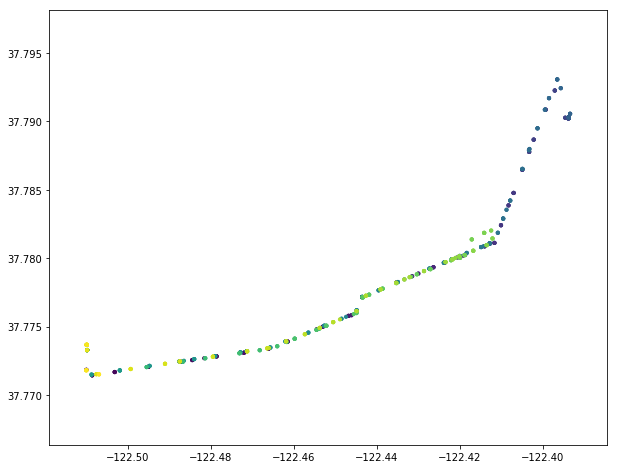

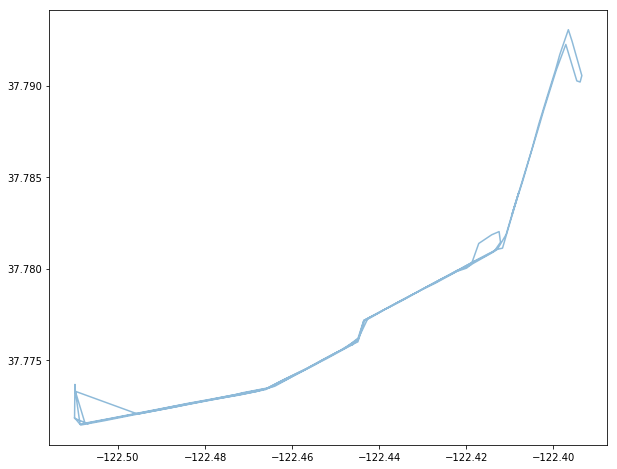

In [23]:
x2, y2, c2 = [],[],[]

for t in data[2]['routeStates'][:600]:
    for v in t['vehicles']:
        if v['vid'] == '5441':
            x2.append(v['lon'])
            y2.append(v['lat'])
            c2.append(int(t['vtime']))
            break

plt.figure(figsize=[10,8])
plt.scatter(x2,y2,c=c2,s=10)
plt.show()
plt.figure(figsize=[10,8])
plt.plot(x2,y2,lw=1.5,alpha=.5)
plt.show()

Depict all buses at a single timepoint, color-coded by route. Also show bus routes by plotting stops.

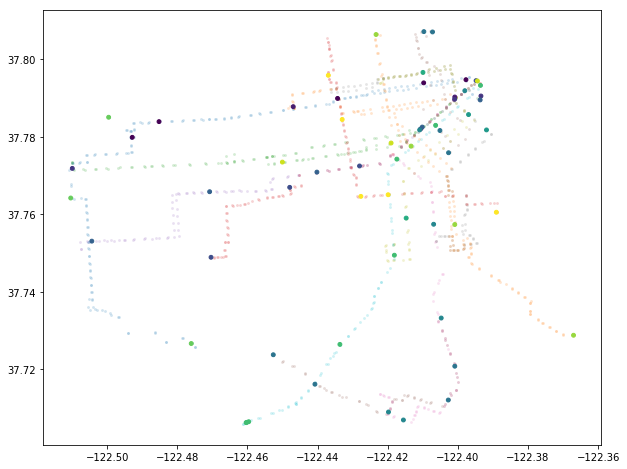

In [27]:
timestamp = data[0]['routeStates'][0]['vtime']
rids = [r['rid'] for r in data]

plt.figure(figsize=[10,8])

x3, y3, c3 = [],[],[]

for r in data:
    r_index = rids.index(r['rid'])
    for t in r['routeStates']:
        if t['vtime'] == timestamp:
            for v in t['vehicles']:
                x3.append(v['lon'])
                y3.append(v['lat'])
                c3.append(r_index)
            break
    sx,sy = [*zip(*[(s['lon'],s['lat']) for s in r['stops']])]
    plt.scatter(sx,sy,s=8,alpha=.2,linewidths=0)
    
plt.scatter(x3,y3,c=c3,s=15)
plt.show()